In [1]:
!pip install tensorflow==2.11 tensorflow-gpu==2.10.0 opencv-python mediapipe sklearn matplotlib

  Using cached tensorflow-2.11.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_gpu-2.10.0-cp310-cp310-win_amd64.whl (455.9 MB)
  Using cached tensorflow_intel-2.11.0-cp310-cp310-win_amd64.whl (266.3 MB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
INFO: pip is looking at multiple versions of tensorflow-gpu to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of <Python from Requires-Python> to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    tensorflow-gpu 2.10.0 depends on keras<2.11 and >=2.10.0
    tensorflow-intel 2.11.0 depends on

ERROR: Cannot install tensorflow and tensorflow-gpu==2.10.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\SHIMUL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

holistic=mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

In [6]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
d_inputs = np.array(['A'])

# Thirty videos worth of data

no_sequences = 5

# Videos are going to be 30 frames in length
sequence_length = 30


for d_input in d_inputs: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, d_input, str(sequence)))
        except:
            pass





mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

holistic=mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

In [7]:


cap = cv2.VideoCapture(0)
    
while cap.isOpened():
    for d_input in d_inputs:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                
                # Recolor Feed
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                # Make Detections
                results = holistic.process(image)
                # print(results.face_landmarks)
                
                # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
                
                # Recolor image back to BGR for rendering
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                
                # 1. Draw face landmarks
                mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                            )
                
                                        
                # 2. Right hand
                mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                                        mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                        ) 
                # Draw right hand connections  
                mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                                        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                        )
            # 4. Pose Detections
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                            )


                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(d_input, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(d_input, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)     
                    cv2.imshow('OpenCV Feed', image)
                   
                


                def extract_keypoints(results):
                    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
                    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
                    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
                    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
                    return np.concatenate([pose, face, lh, rh])
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, d_input, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()



In [59]:
actions = np.array(['hello','food','A'])
DATA_PATH = os.path.join('MP_Data') 

In [60]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical


label_map = {label:num for num, label in enumerate(actions)}
print(label_map)
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])







{'hello': 0, 'food': 1, 'A': 2}


In [73]:
X = np.array(sequences)


In [62]:
X.shape

(15, 30, 1662)

In [74]:
y = to_categorical(labels).astype(int)


In [75]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(1, 3)

In [66]:
y_test.shape

(1, 3)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [68]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [69]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [70]:
y_test.shape

(1, 3)

In [71]:
res = [.7, 0.2, 0.1]

In [72]:
actions[np.argmax(res[0])]

'hello'

In [58]:
y_train

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [51]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [52]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
1/1 [==============================] - 7s 7s/step - loss: 0.7194 - categorical_accuracy: 0.7895
Epoch 2/2000
1/1 [==============================] - 0s 196ms/step - loss: 11.4789 - categorical_accuracy: 0.4737
Epoch 3/2000
1/1 [==============================] - 0s 254ms/step - loss: 0.6880 - categorical_accuracy: 0.7895
Epoch 4/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.7139 - categorical_accuracy: 0.6316
Epoch 5/2000
1/1 [==============================] - 0s 283ms/step - loss: 0.7930 - categorical_accuracy: 0.5789
Epoch 6/2000
1/1 [==============================] - 0s 271ms/step - loss: 0.8205 - categorical_accuracy: 0.5789
Epoch 7/2000
1/1 [==============================] - 0s 204ms/step - loss: 0.8716 - categorical_accuracy: 0.5789
Epoch 8/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.9300 - categorical_accuracy: 0.5263
Epoch 9/2000
1/1 [==============================] - 0s 211ms/step - loss: 0.9810 - categorical_accuracy: 0

KeyboardInterrupt: 

array([[[ 8.74241531e-01,  4.11592007e-01, -1.33425593e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 8.41811180e-01,  4.06080455e-01, -5.52733123e-01, ...,
          3.82405013e-01,  5.56889594e-01, -1.50033587e-03],
        [ 7.95267463e-01,  4.23843473e-01, -5.91961861e-01, ...,
          3.83839995e-01,  5.67787290e-01, -2.47131148e-03],
        ...,
        [ 6.90561891e-01,  4.47379202e-01, -8.59398067e-01, ...,
          3.66588712e-01,  5.93185961e-01,  1.18339621e-03],
        [ 6.90577149e-01,  4.47816283e-01, -9.01165485e-01, ...,
          3.64603758e-01,  5.93286157e-01,  1.59079768e-03],
        [ 6.90590978e-01,  4.47890162e-01, -9.03458297e-01, ...,
          3.64258468e-01,  5.94905496e-01,  4.44672955e-03]],

       [[ 6.88734174e-01,  4.50030357e-01, -8.15094590e-01, ...,
          3.48248184e-01,  5.88280141e-01,  8.73896468e-04],
        [ 6.88343823e-01,  4.50400978e-01, -8.82669151e-01, ...,
          3.44647884e-01,  5.90224504e

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 596,708
Trainable params: 596,708
Non-trai

In [54]:
model.predict(X_test)

1/1 [==============================] - 1s 575ms/step


array([[9.9999654e-01, 3.4331092e-06, 3.5687216e-19, 1.1452207e-23]],
      dtype=float32)

In [55]:
X_test

array([[[ 0.49382895,  0.69172567, -1.00435102, ...,  0.09734851,
          0.55409873, -0.01817901],
        [ 0.50199711,  0.66727984, -1.01802087, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50383604,  0.66104478, -1.03485322, ...,  0.18320382,
          0.52497149, -0.01936192],
        ...,
        [ 0.5865007 ,  0.6686992 , -0.88518935, ...,  0.12597887,
          0.5903697 , -0.03015416],
        [ 0.58829761,  0.6686359 , -0.87659007, ...,  0.12818485,
          0.59027672, -0.03046061],
        [ 0.59046084,  0.66804391, -0.86748344, ...,  0.12593517,
          0.58940411, -0.02592205]]])

In [27]:
actions[np.argmax(res[2])]

'hello'

In [28]:
res

[0.7, 0.2, 0.1]

In [29]:
model.save('action.h5')

In [30]:
model.load_weights('action.h5')

In [31]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [32]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 38ms/step


In [33]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [34]:
yhat


[1]

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 0],
        [0, 1]]], dtype=int64)

In [ ]:
accuracy_score(ytrue, yhat)

1.0

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

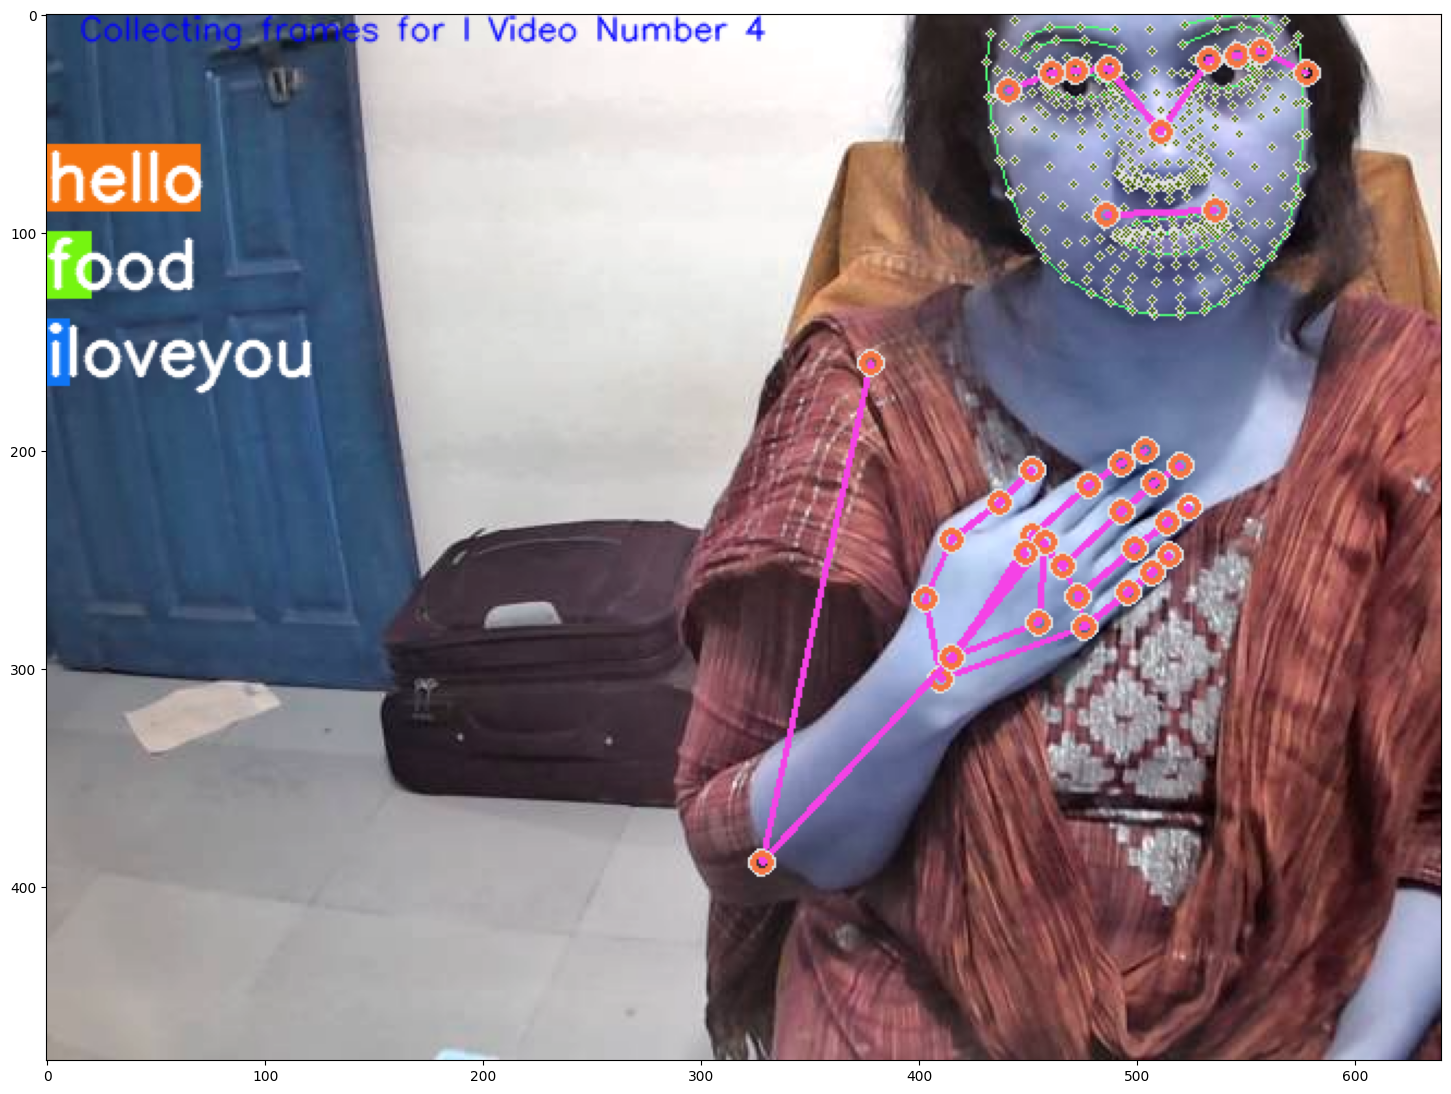

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 

while cap.isOpened():

    # Read feed
    ret, frame = cap.read()

    # Make detections
    results = holistic.process(image)
    print(results)
    
    # Draw landmarks
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                            )
                
                                        
                # 2. Right hand
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                            ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                            )
# 4. Pose Detections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                )
    
    # 2. Prediction logic
    keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
    sequence.append(keypoints)
    sequence = sequence[-30:]
    
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        
        
    #3. Viz logic
        if res[np.argmax(res)] > threshold: 
            if len(sentence) > 0: 
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5: 
            sentence = sentence[-5:]

        # Viz probabilities
        image = prob_viz(res, actions, image, colors)
        
    cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
    cv2.putText(image, ' '.join(sentence), (3,30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    # Show to screen
    cv2.imshow('OpenCV Feed', image)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable